In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target
feature_names = boston.feature_names
print(X.shape) 
print(y.shape) 
print(feature_names) 

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset: 70% vs 30% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# initiate the linear model and fit with data
lm =LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("The R-squared value is: {0:0.4f} \n".format(lm.score(X_train, y_train)))

The R-squared value is: 0.7645 



In [ ]:
param_df = pd.DataFrame({"Features": ['intercept'] + list(feature_names), 
"Coef": [lm.intercept_] + list(lm.coef_)}) 
cols = param_df.columns.tolist() 
cols = cols[-1:]+cols[:-1] 
param_df = param_df[cols] 
print(param_df)

         Coef   Features
0   37.937108  intercept
1   -0.121310       CRIM
2    0.044466         ZN
3    0.011342      INDUS
4    2.511246       CHAS
5  -16.231253        NOX
6    3.859068         RM
7   -0.009985        AGE
8   -1.500270        DIS
9    0.242143        RAD
10  -0.011072        TAX
11  -1.017753    PTRATIO
12   0.006814          B
13  -0.486738      LSTAT


In [ ]:
#%% check performance on test data 
predicted = lm.predict(X_test)

In [ ]:
import numpy as np
mae = np.mean(abs(predicted-y_test))
rmse = np.sqrt(np.mean((predicted-y_test)**2))
rae = np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)

In [ ]:
mae

3.6099040603818096

In [ ]:
rmse

5.214975145375423

In [ ]:
rae

0.5561156583252186

In [ ]:
rse

0.326617449359983

In [ ]:
print("The R-squared value is: {0:0.4f}".format(lm.score(X_test, y_test))) 
print("Mean Absolute Error: {0:0.6f}".format(mae)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse)) 
print("Relative Absolute Error: {0:0.6f}".format(rae)) 
print("Relative Squared Error: {0:0.6f}".format(rse)) 

The R-squared value is: 0.6734
Mean Absolute Error: 3.609904
Root Mean Squared Error: 5.214975
Relative Absolute Error: 0.556116
Relative Squared Error: 0.326617


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

In [ ]:
# initiate the linear model 
lm = LinearRegression()

In [ ]:
# scale the features 
min_mascaler =  preprocessing.MinMaxScaler()
scaled_minmax = min_mascaler.fit_transform(X_train)
scaled_minmadf = pd.DataFrame(scaled_minmax, columns = feature_names)

In [ ]:
# recursive feature elimination with cross validation, using r-squared as metric 
rfecv = RFECV(estimator=lm, step=1, cv=5) 
rfecv.fit(scaled_minmadf, y_train)

RFECV(cv=5,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [ ]:
# print the optimal number of feature 
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 6


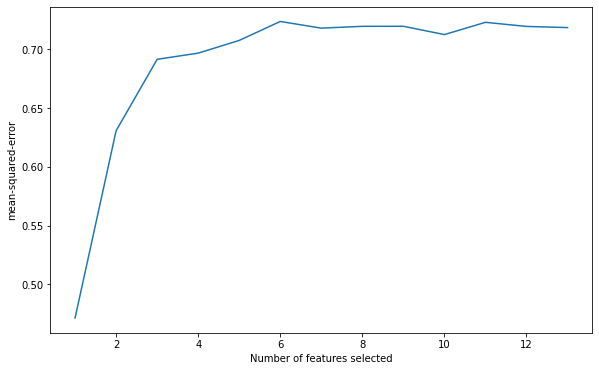

In [ ]:
# plot number of features VS. cross-validation scores 
plt.figure(figsize=(6 * 1.618, 6)) 
plt.xlabel("Number of features selected") 
plt.ylabel("mean-squared-error") 
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

In [ ]:
# %% fit model с выбранными функциями  
#%% fit model with selected features X_train_new = X_train[:,rfecv.support_] 
X_train_new = X_train[:,rfecv.support_]
lm2 = LinearRegression() 
lm2.fit(X_train_new, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predicted = lm2.predict(X_train_new)
 
rmse = np.sqrt(np.mean((predicted-y_train)**2))
print("Root Mean Squared Error: {0:0.4f}" .format(rmse)) 

Root Mean Squared Error: 4.6594


In [ ]:
# print the R-squared 
print("The R-squared value is: {0:0.4f} \n".format(lm2.score(X_train_new, y_train)))

The R-squared value is: 0.7439 



In [ ]:
feature_cols_selected = list(np.array(feature_names)[rfecv.support_]) 
# print intercept and coefficients
param_df = pd.DataFrame({"Features": ['intercept'] + feature_cols_selected , 
"Coef": [lm2.intercept_] + list(lm2.coef_)})

cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1] 
param_df = param_df[cols] 
print(param_df)

        Coef   Features
0  37.722274  intercept
1  -0.086733       CRIM
2 -17.797964        NOX
3   4.244288         RM
4  -1.177934        DIS
5  -1.111761    PTRATIO
6  -0.529948      LSTAT


In [ ]:
# %% проверить производительность по тестовым данным 
#%% check performance on test data
X_test_part = X_test[:,rfecv.support_]
predicted = lm2.predict(X_test_part)

In [ ]:
mae = np.mean(abs(predicted-y_test))
rmse = np.sqrt(np.mean((predicted-y_test)**2))
rae = np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test)))
rse = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)

In [ ]:
# print metrics on test data
print("The R-squared value is: {0:0.4f} \n".format(lm2.score(X_train_new, y_train)))
print("Mean Absolute Error: {0:0.6f}".format(mae))
print("Root Mean Squared Error: {0:0.6f}".format(rmse))
print("Relative Absolute Error: {0:0.6f}".format(rae))
print("Relative Squared Error: {0:0.6f}".format(rse))  

The R-squared value is: 0.7439 

Mean Absolute Error: 3.867736
Root Mean Squared Error: 5.553711
Relative Absolute Error: 0.595835
Relative Squared Error: 0.370426


In [ ]:
#%% use cross validation to estimate hyperparameters on a grid
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from time import time

In [ ]:
gbm = GradientBoostingRegressor() 
gbm.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# print the R-squared 
from sklearn.metrics import r2_score 
print("The R-squared value is: {0:0.4f} \n".format(r2_score(y_train,gbm.predict(X_train)))) 

The R-squared value is: 0.9851 



In [ ]:
params = {'n_estimators': 1000, 'max_depth': 3, 'min_samples_split': 4,
'learning_rate': 0.01, 'loss': 'ls', 'random_state': 0}
gbm_1 = GradientBoostingRegressor(**params)
gbm_1

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
gbm_1.fit(X_train, y_train)
print("The R-squared value is: {0:0.4f} \n"
.format(r2_score(y_train, gbm_1.predict(X_train)))) 

The R-squared value is: 0.9842 



In [ ]:
start = time()
tuned_params_gbm = {'n_estimators': [500, 1000],
 'max_depth': [2, 4],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [2, 6],
 'learning_rate': [0.001, 0.01]}
gbm_scv = GridSearchCV(gbm, tuned_params_gbm, cv=5)
gbm_scv.fit(X_train, y_train)
print("The grid cross validation lasted {0:0.2f} seconds".format(time() - start))
print("Best parameters set found on development set:")
print(gbm_scv.best_params_)
#for params, mean_score, scores in gbm_scv_scores_:
#   print("{0:0.3f} (+/-{1:0.3f}) for {2:s}"
#   .format(mean_score, scores.std() * 2, str(params)))

The grid cross validation lasted 110.93 seconds
Best parameters set found on development set:
{'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1000}


In [ ]:
# подходящая модель с наилучшим набором значений параметров
# fit model with the best set of parameter values
params_2 = {'n_estimators': 100, 'max_depth': 5,  'min_samples_leaf': 2,
 'min_samples_split': 6,
 'learning_rate': 0.01, 'loss': 'ls'}
gbm_2 = GradientBoostingRegressor(**params_2)
gbm_2.fit(X_train, y_train)
# print the R-squared
from sklearn.metrics import r2_score
print("The R-squared value is: {0:0.4f} \n".
 format(r2_score(y_train,gbm_2.predict(X_train))))


The R-squared value is: 0.8243 



In [ ]:
# %% проверить производительность на основе тестовых данных
#%% check performance on test data
predicted = gbm_2.predict(X_test)

mae = np.mean(abs(predicted-y_test))
rmse = np.sqrt(np.mean((predicted-y_test)**2))
rae = np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)

# print metrics on test data
from sklearn.metrics import r2_score
print("The R-squared value is: {0:0.4f} \n".format(r2_score(y_test,predicted)))
print("Mean Absolute Error: {0:0.6f}".format(mae))
print("Root Mean Squared Error: {0:0.6f}".format(rmse))
print("Relative Absolute Error: {0:0.6f}".format(rae))
print("Relative Squared Error: {0:0.6f}".format(rse))

The R-squared value is: 0.6936 

Mean Absolute Error: 3.646350
Root Mean Squared Error: 5.051006
Relative Absolute Error: 0.561730
Relative Squared Error: 0.306401


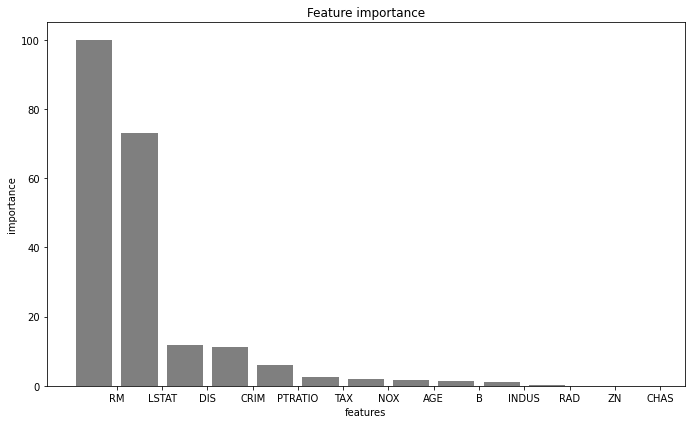

Text(0, 0.5, 'Deviance')

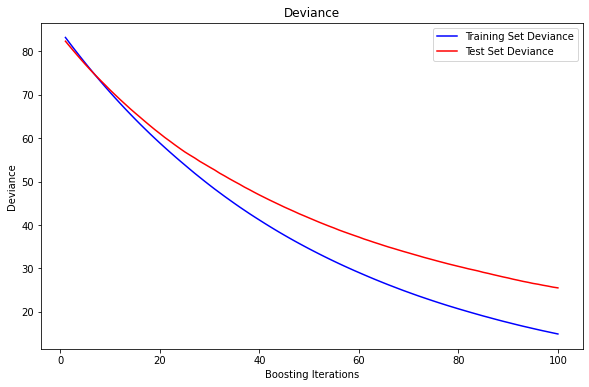

In [ ]:
# plot variable importance
import numpy as np
import matplotlib.pyplot as plt

feature_importance = gbm_2.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(6 * 1.618, 6))
index = np.arange(len(feature_names))
bar_width = 0.5
plt.bar(index, feature_importance[sorted_idx], color='black', alpha=0.5)
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Feature importance')
plt.xticks(index + bar_width, np.array(feature_names)[sorted_idx])
plt.tight_layout()
plt.show()

# plot deviance for training set and test set
test_score = np.zeros(params_2['n_estimators'])
for j, y_pred in enumerate(gbm_2.staged_predict(X_test)):
    test_score[j] = gbm_2.loss_(y_test, y_pred)

plt.figure(figsize=(6 * 1.618, 6))
plt.title('Deviance')
plt.plot(np.arange(params_2['n_estimators']) + 1, gbm_2.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params_2['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')